# Bunch Commands

In [1]:
from pytao import Tao

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize Tao on the CSR beam tracking example

In [3]:
tao = Tao(
    "-init $ACC_ROOT_DIR/bmad-doc/tao_examples/csr_beam_tracking/tao.init -noplot"
)

## bunch_params

Bunch statistics can be retrieved from any element as a dict.

In [4]:
stats = tao.bunch_params("end")
stats

{'twiss_beta_x': 0.301344571266547,
 'twiss_alpha_x': -2.15210497361757,
 'twiss_gamma_x': 18.6880944753713,
 'twiss_phi_x': 0.0,
 'twiss_eta_x': -0.0481939319838284,
 'twiss_etap_x': -0.454973392781903,
 'twiss_sigma_x': 6.0547292115994e-05,
 'twiss_sigma_p_x': 0.000476810213058656,
 'twiss_emit_x': 1.21653911572771e-08,
 'twiss_norm_emit_x': 9.99817439089306e-07,
 'twiss_beta_y': 0.407832041608049,
 'twiss_alpha_y': 1.94408133190159,
 'twiss_gamma_y': 11.7191680334955,
 'twiss_phi_y': 0.0,
 'twiss_eta_y': -0.0457317680475184,
 'twiss_etap_y': 0.0263984769565802,
 'twiss_sigma_y': 7.04370887664636e-05,
 'twiss_sigma_p_y': 0.000377580117100171,
 'twiss_emit_y': 1.21652615972309e-08,
 'twiss_norm_emit_y': 9.99806791146145e-07,
 'twiss_beta_z': 95.8242541895164,
 'twiss_alpha_z': -1.24059179271663,
 'twiss_gamma_z': 0.0264971328775929,
 'twiss_phi_z': 0.0,
 'twiss_eta_z': 0.0,
 'twiss_etap_z': 0.0,
 'twiss_sigma_z': 0.000899458451089916,
 'twiss_sigma_p_z': 1.49569425183209e-05,
 'twiss_

This says that the full beam is saved at this element

In [5]:
stats["beam_saved"]

True

## bunch1

Array data from a bunch can be retrieved. Available coordinates are:

x, px, y, py, z, pz, s, t, charge, p0c, state, ix_ele

Appropriate data types are returned

In [6]:
tao.bunch1("end", "x")[0:10]

array([-1.69327762e-07, -4.58088151e-06,  4.46517206e-06, -1.72815751e-06,
        9.38761727e-06,  5.93297414e-05, -6.70659005e-05,  4.15474873e-05,
       -7.45202256e-05,  5.06597770e-05])

In [7]:
tao.bunch1("end", "ix_ele")[0:10]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int32)

## Plot in matplotlib

This can be used to plot particles.

In [8]:
%config InlineBackend.figure_format = 'retina' # Nicer plotting
%matplotlib inline

In [9]:
xdat = tao.bunch1("end", "x")
pxdat = tao.bunch1("end", "px")
chargedat = tao.bunch1("end", "charge")

xdata = 1000 * xdat
ydata = 1000 * pxdat
weights = chargedat

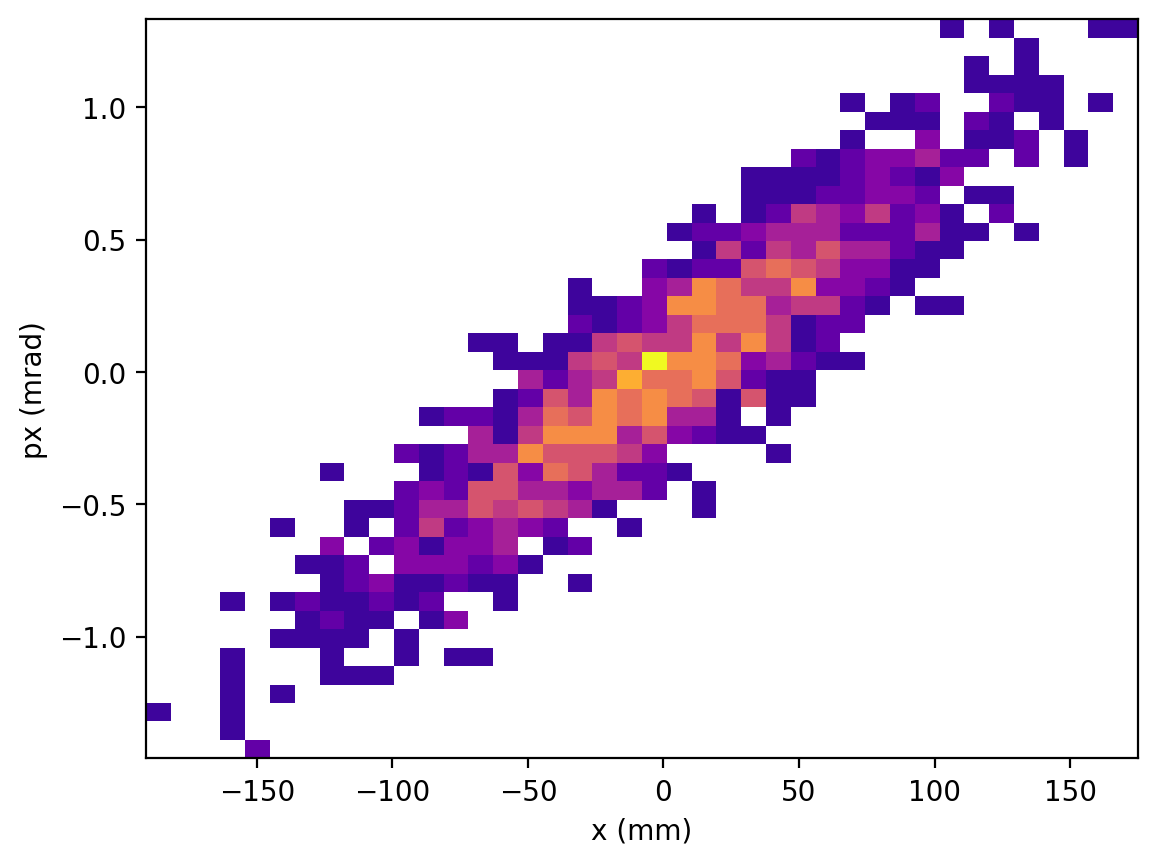

In [10]:
# hist2d

mycmap = plt.get_cmap("plasma")  # viridis plasma inferno magma and _r versions
mycmap.set_under(color="white")  # map 0 to this color
myvmin = 1e-30  # something tiny
# Bin particles
plt.hist2d(
    x=1000 * xdata, y=ydata, bins=2 * [40], weights=weights, cmap=mycmap, vmin=myvmin
)
plt.xlabel("x (mm)")
plt.ylabel("px (mrad)")
plt.show()

Numpy histogram 2d, with custom color map

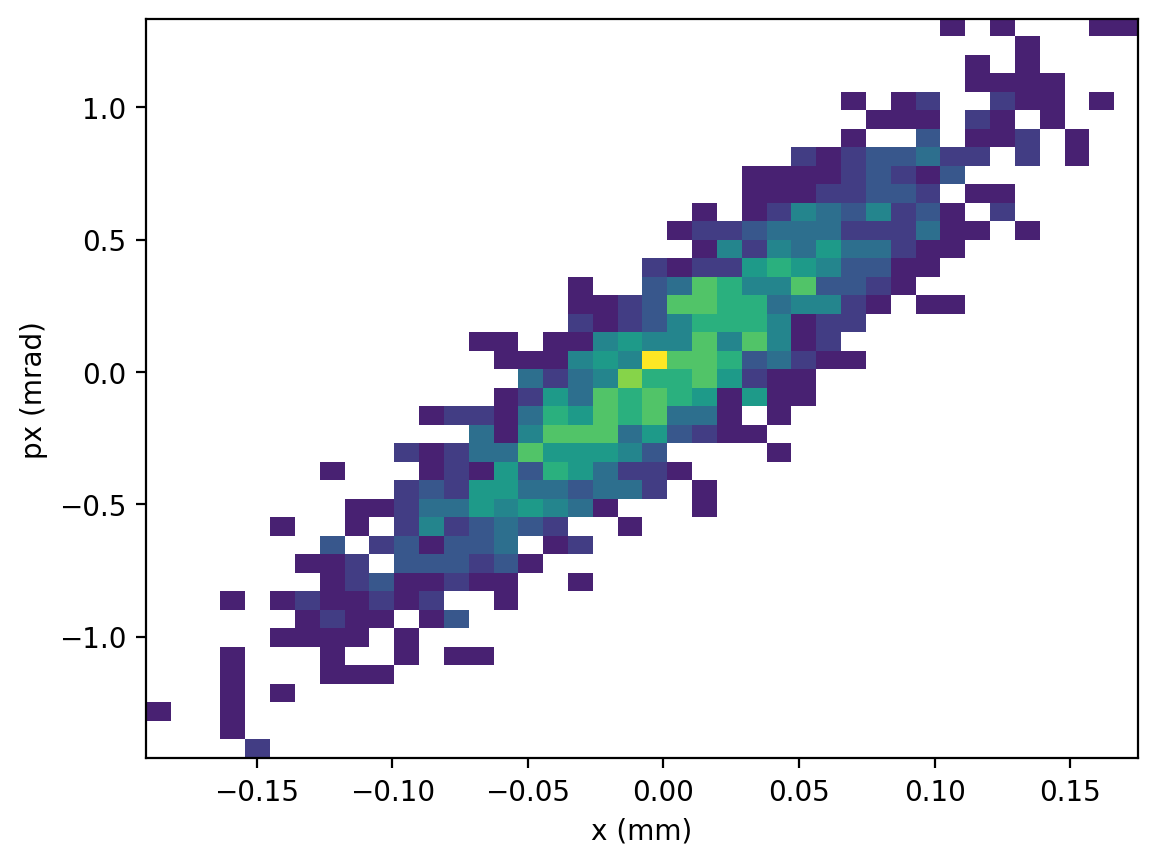

In [11]:
import matplotlib.colors as colors

mycmap = plt.get_cmap("viridis")  # viridis plasma inferno magma and _r versions
mycmap.set_under(color="white")  # map 0 to this color
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)

xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

image = np.flip(H.T, axis=0)  #
imax = np.max(image)
norm = colors.Normalize(vmin=1e-12 * imax, vmax=imax)
plt.xlabel("x (mm)")
plt.ylabel("px (mrad)")
plt.imshow(
    image, cmap=mycmap, norm=norm, extent=[xmin, xmax, ymin, ymax], aspect="auto"
);

In [12]:
np.min(image), np.max(image)

(np.float64(0.0), np.float64(8.469999999999999e-13))

## Plot in Bokeh

In [13]:
from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes, colors
from bokeh.models import ColumnDataSource

output_notebook(verbose=False, hide_banner=True)

pal = palettes.Viridis[256]
# white=colors.named.white
# pal[0] = white # replace 0 with white

In [14]:
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

In [15]:
ds = ColumnDataSource(data=dict(image=[H.transpose()]))
p = figure(
    x_range=[xmin, xmax],
    y_range=[ymin, ymax],
    title="Bunch at end",
    x_axis_label="x (mm)",
    y_axis_label="px (mrad)",
    width=500,
    height=500,
)
p.image(
    image="image",
    source=ds,
    x=xmin,
    y=ymin,
    dw=xmax - xmin,
    dh=ymax - ymin,
    palette=pal,
)
show(p)

## Data for ParticleGroup

The above commands have been packaged into two functions for easier use, and to easily create ParticleGroup objects

In [16]:
data = tao.bunch_data("end")
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'status', 'weight', 'z', 'species'])

In [17]:
from pmd_beamphysics import ParticleGroup

P = ParticleGroup(data=data)
P

<ParticleGroup with 1000 particles at 0x7fac84ffcbc0>

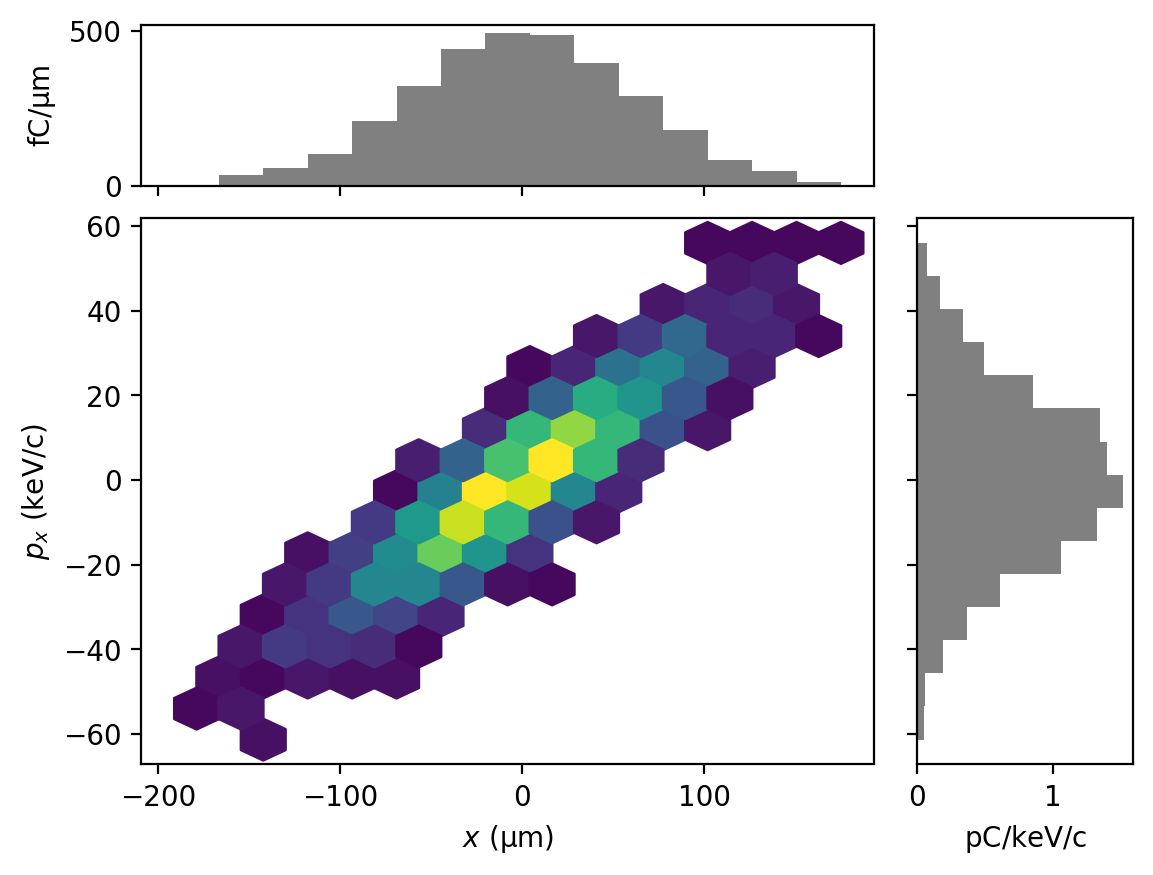

In [18]:
P.plot("x", "px")

In [19]:
P.twiss("xy")

{'alpha_x': np.float64(-2.152104973617561),
 'beta_x': np.float64(0.30134283249050764),
 'gamma_x': np.float64(18.688202307406257),
 'emit_x': np.float64(1.2177638991702107e-08),
 'eta_x': np.float64(-0.048193653902319646),
 'etap_x': np.float64(-0.4549733927846398),
 'norm_emit_x': np.float64(1.00082403216066e-06),
 'alpha_y': np.float64(1.94408133190161),
 'beta_y': np.float64(0.4078296883929989),
 'gamma_y': np.float64(11.719235654179966),
 'emit_y': np.float64(1.2177509301217804e-08),
 'eta_y': np.float64(-0.045731504170227914),
 'etap_y': np.float64(0.02639847694381581),
 'norm_emit_y': np.float64(1.0008133734973906e-06)}

# bunch_comb

In [20]:
tao.bunch_comb("x")

array([], dtype=float64)

Make a nice plot with the beam envelope

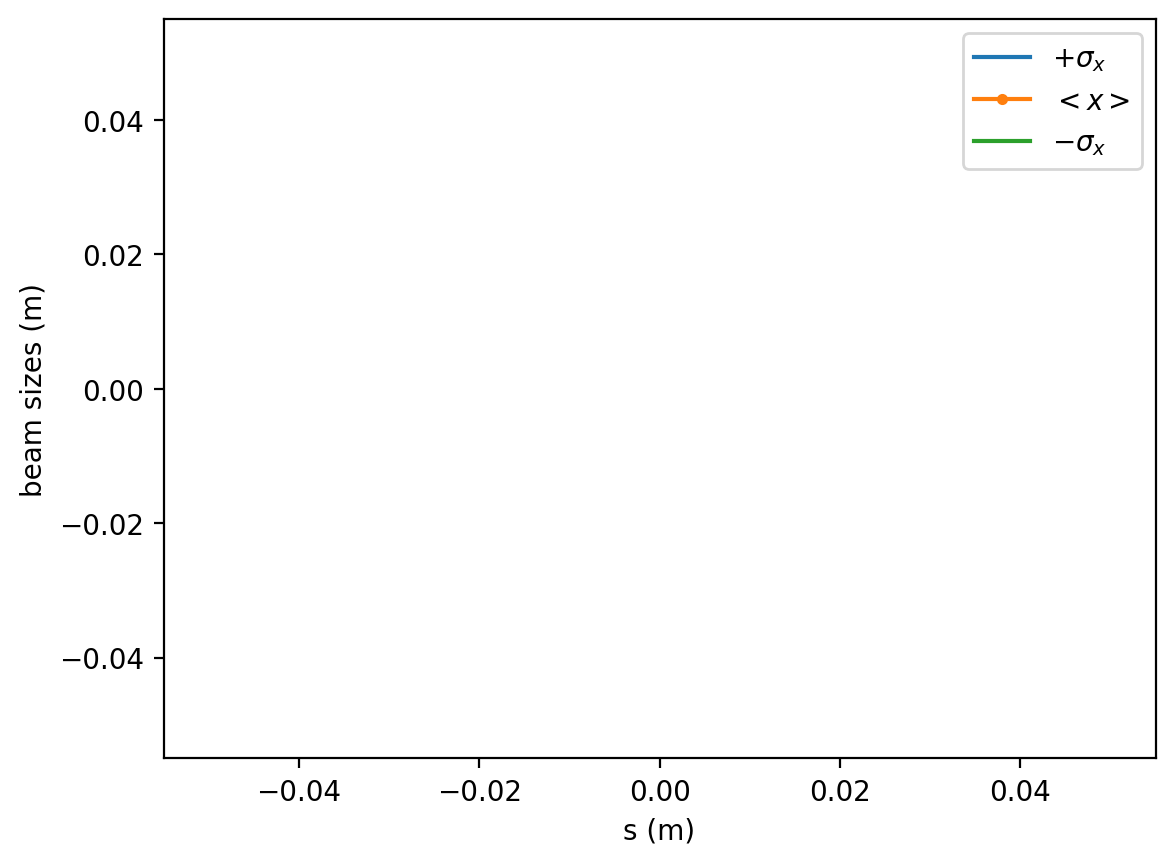

In [21]:
s = tao.bunch_comb("s")
mean_x = tao.bunch_comb("x")
max_x = mean_x + tao.bunch_comb("rel_max.1")
min_x = mean_x + tao.bunch_comb("rel_min.1")
sigma_x = np.sqrt(tao.bunch_comb("sigma.11"))
fig, ax = plt.subplots()

ax.fill_between(s, min_x, max_x, alpha=0.2)
ax.plot(s, sigma_x, label=r"$+\sigma_x$")
ax.plot(s, mean_x, label=r"$<x>$", marker=".")
ax.plot(s, -sigma_x, label=r"$-\sigma_x$")
ax.set_xlabel("s (m)")
ax.set_ylabel("beam sizes (m)")
plt.legend();

Beam betas

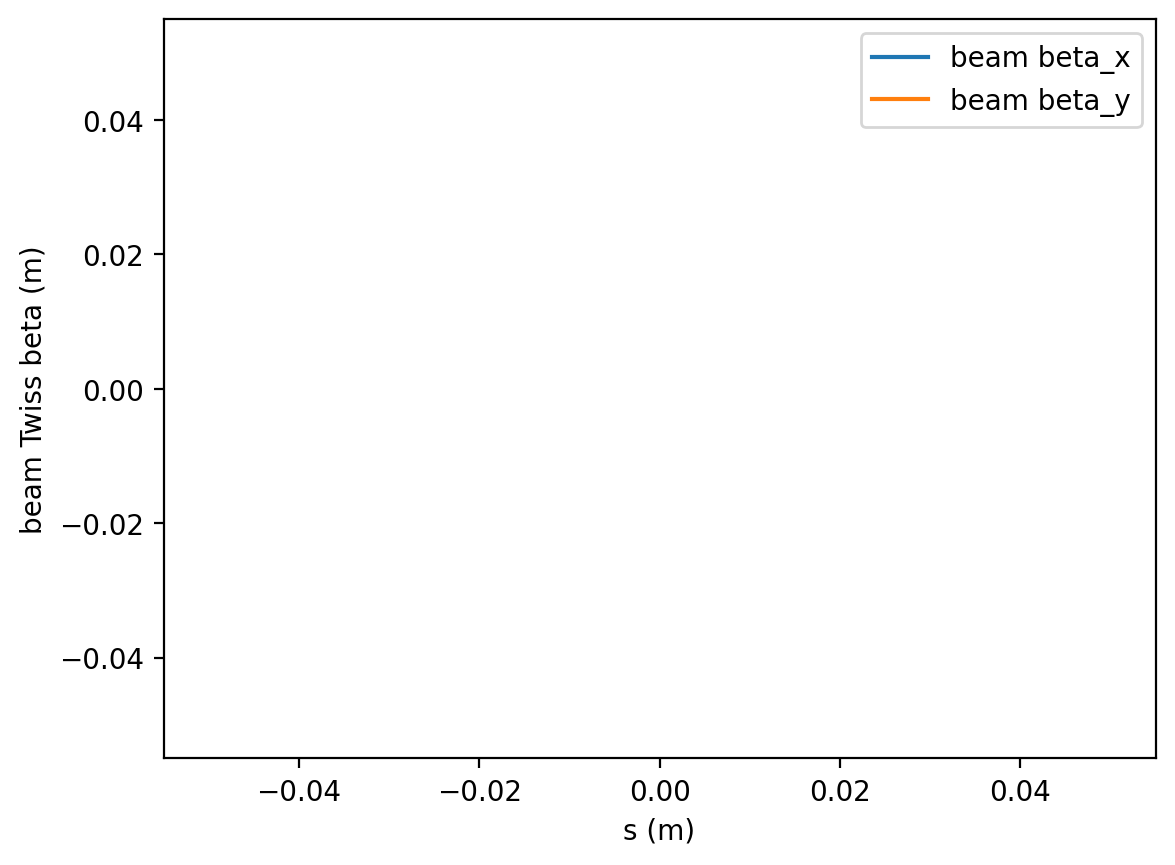

In [22]:
plt.plot(tao.bunch_comb("s"), 1000 * tao.bunch_comb("x.beta"), label="beam beta_x")
plt.plot(tao.bunch_comb("s"), 1000 * tao.bunch_comb("y.beta"), label="beam beta_y")
plt.xlabel("s (m)")
plt.ylabel("beam Twiss beta (m)")
plt.legend();